In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from scipy.stats import uniform

In [4]:
NUM_LABEL_COLS = 13
df = pd.read_pickle('./data/5s/labeled/features_r02/all_data.pkl')

In [5]:
df_filtered = df
df_filtered.shape

(9080, 10790)

In [7]:
# exclude records we want to exclude
df_filtered = df_filtered[df_filtered['trmp'] == '0'] 
df_filtered = df_filtered[df_filtered['sop'] == '0']
df_filtered = df_filtered[df_filtered['bari'] == '0']
df_filtered = df_filtered[df_filtered['clrt'] == '0']
df_filtered = df_filtered[df_filtered['tora'] == '0']
df_filtered = df_filtered[df_filtered['othr'] == '0']
df_filtered = df_filtered[df_filtered['tenr'] == '0']
df_filtered = df_filtered[df_filtered['trmb'] == '0']
df_filtered = df_filtered[df_filtered['otrb'] == '0']

num_x_cols = df_filtered.shape[1] - NUM_LABEL_COLS
data = df_filtered.iloc[:, 1:num_x_cols].to_numpy() 
# ^ these are the features
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

target = df_filtered[['alto']].to_numpy().ravel()  
# ^ these are the labels

In [8]:
xs = [n for n in range(4, 60, 1)]
ys = []
for x in xs:
    pca = PCA(n_components=x)
    pca.fit(data)
    d = pca.transform(data)
    x_train, x_test, y_train, y_test = \
         train_test_split(d, target, test_size=0.20, random_state=0)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    ys.append(clf.score(x_test, y_test))
    

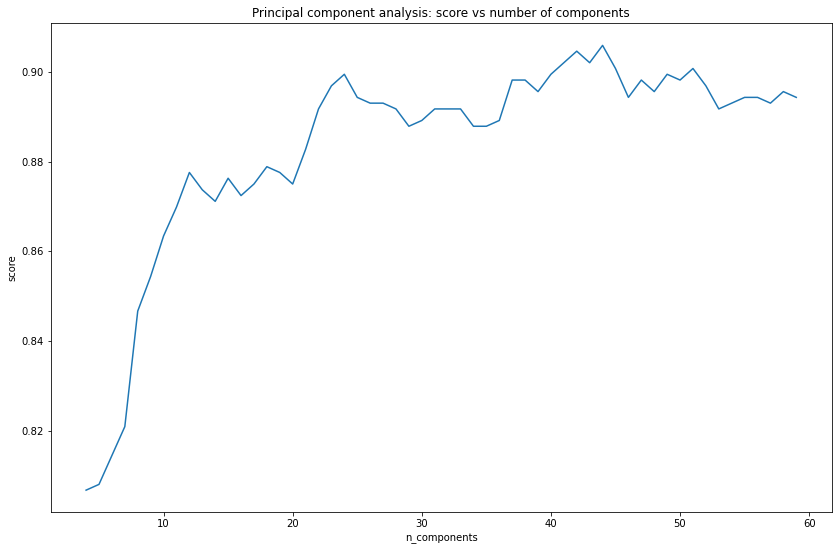

In [9]:
fig = plt.figure(figsize=(14, 9))    
plt.plot(xs, ys)
plt.xlabel('n_components')
plt.ylabel('score')
plt.title("Principal component analysis: score vs number of components")
pass


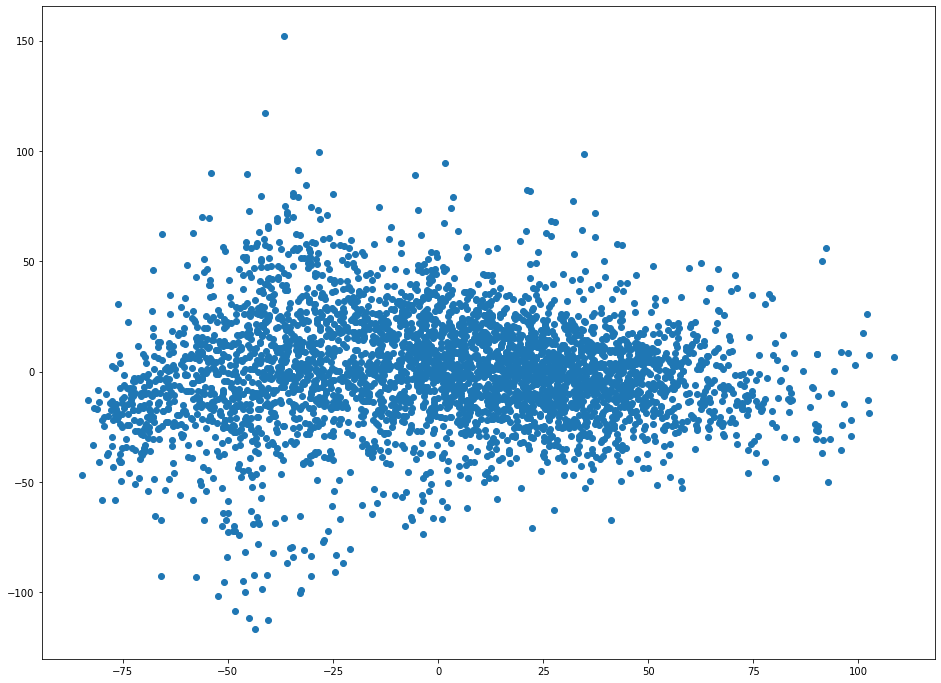

In [10]:
reduced_data = PCA(n_components=2).fit_transform(data)
fig = plt.figure(figsize=(16, 12))
s = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=None)

In [11]:
pca = PCA()
pca.fit(data)

PCA()

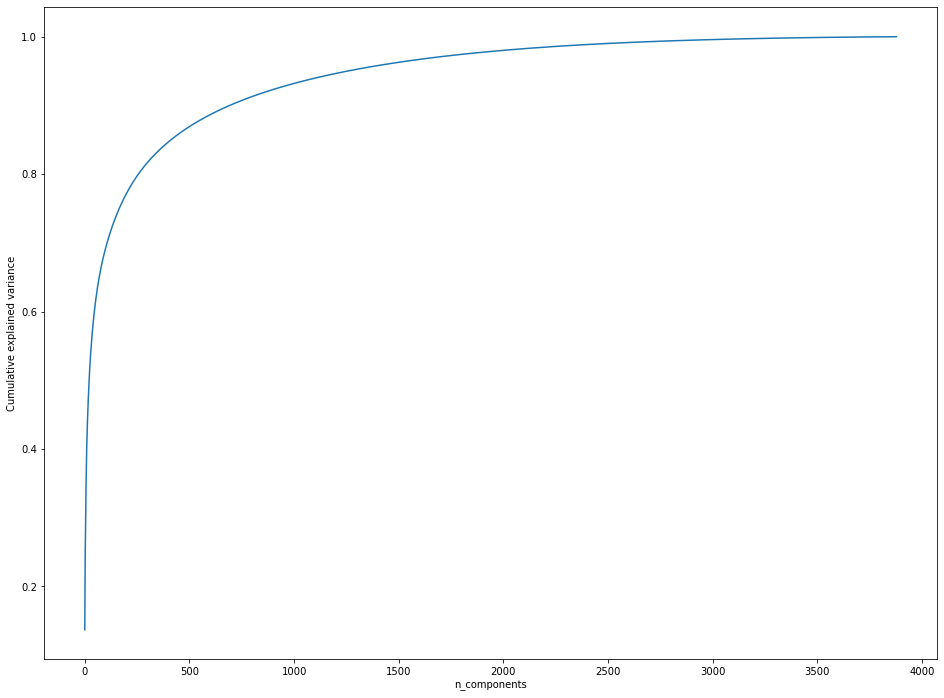

In [12]:
fig = plt.figure(figsize=(16, 12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance');

In [15]:
pca = PCA(0.59).fit(data)
pca.n_components_

44